In [1]:
import finta as f
from finta import TA
from nselib import capital_market
from datetime import datetime
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib as tb
# from talib import BBANDS



1
1
1
1


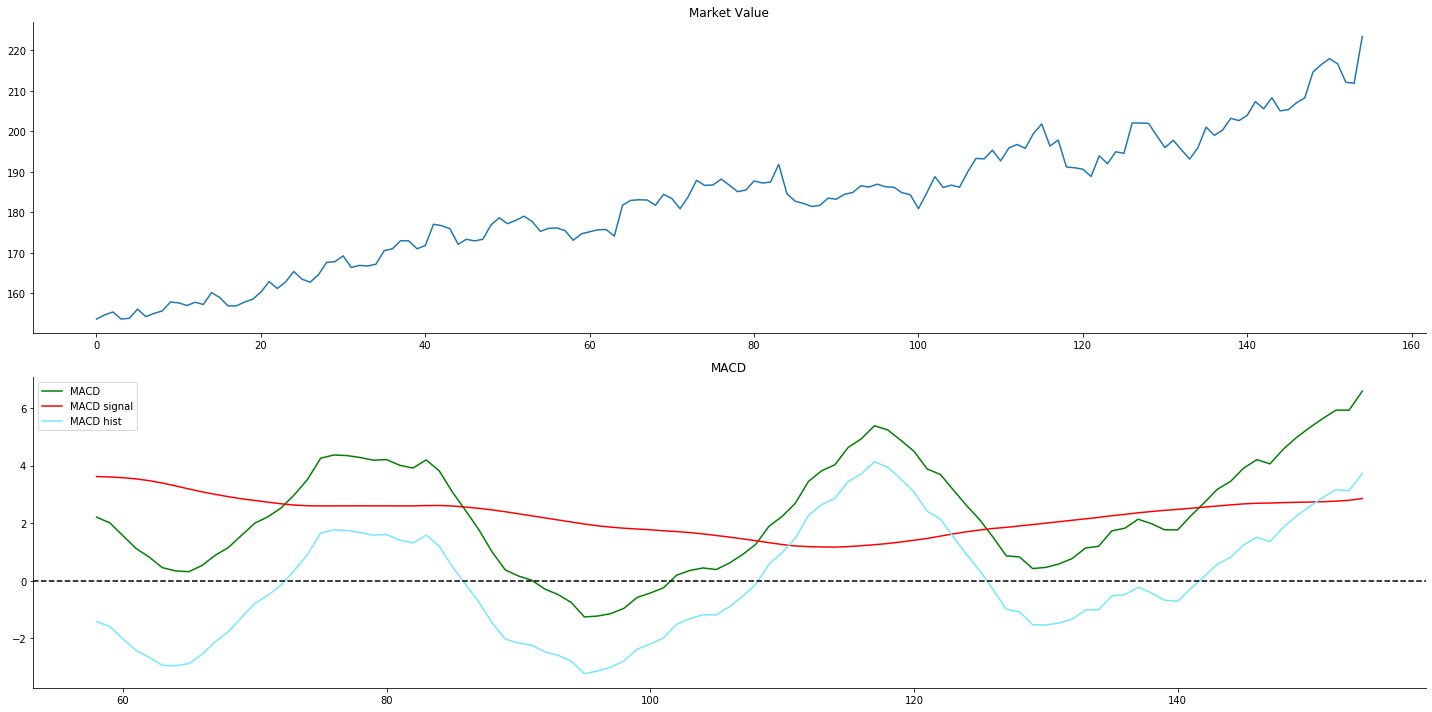

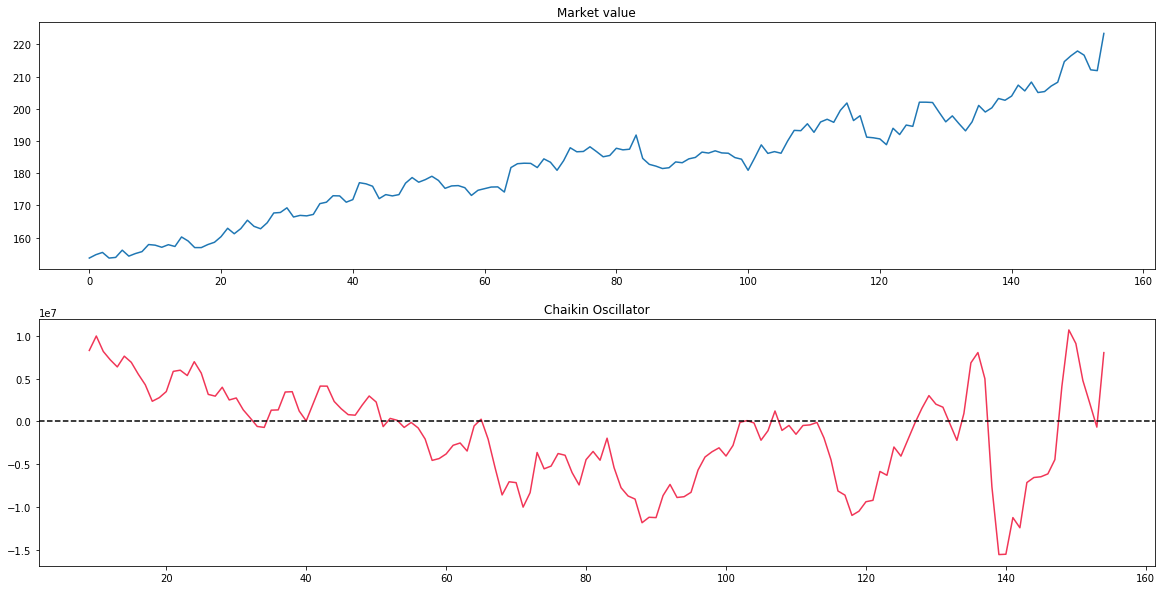

In [5]:
today_date = datetime.now().strftime('%d-%m-%Y')
data = capital_market.price_volume_data(symbol='ONGC', from_date='01-06-2023', to_date=today_date)
# print(data)
df = pd.DataFrame({'Date':data['Date'], 'Close':data['ClosePrice']})
l = len(df)

flag = 1
for i in range(l):
    if type(data['HighPrice'][i]) != np.float64:
        flag = 0
print(flag)

if flag == 0:
    data['HighPrice'] = data['HighPrice'].str.replace(',', '').astype(float)
if flag == 1:
    data['HighPrice'] = data['HighPrice'].replace(',', '').astype(float)

flag = 1
for i in range(l):
    if type(data['LowPrice'][i]) != np.float64:
        flag = 0
print(flag)

if flag == 0:
    data['LowPrice'] = data['LowPrice'].str.replace(',', '').astype(float)
if flag == 1:
    data['LowPrice'] = data['LowPrice'].replace(',', '').astype(float)

flag = 1
for i in range(l):
    if type(data['ClosePrice'][i]) != np.float64:
        flag = 0
print(flag)

if flag == 0:
    data['ClosePrice'] = data['ClosePrice'].str.replace(',', '').astype(float)
if flag == 1:
    data['ClosePrice'] = data['ClosePrice'].replace(',', '').astype(float)


flag = 1
for i in range(l):
    if type(df['Close'][i]) != np.float64:
        flag = 0
print(flag)

if flag == 0:
    df['Close'] = df['Close'].str.replace(',', '').astype(float)
if flag == 1:
    df['Close'] = df['Close'].replace(',', '').astype(float)

# print(df['Close'])


# ema = tb.EMA(df['Close'], timeperiod=34)
# plt.plot(df['Close'] )
# plt.plot(ema)
# plt.title("34 Day Exponential Moving Average (EMA)")
# plt.show()

# u_band, m_band, l_band = tb.BBANDS(df['Close'], timeperiod=30, nbdevup=2, nbdevdn=2, matype=0)
# plt.plot(u_band, color='g')
# plt.plot(m_band)
# plt.plot(l_band, color='r')
# plt.title("Bollinger bands")
# plt.show()

# ma = tb.MA(df['Close'], timeperiod=34, matype=0)
# plt.plot(df['Close'])
# plt.plot(ma)
# plt.title("34 Day Moving Average")
# plt.show()

# kama = tb.KAMA(df['Close'], timeperiod=34)
# plt.plot(df['Close'])
# plt.plot(kama)
# plt.title("34 Day Kaufman Adaptive Moving Average")
# plt.show()

# t3ma = tb.T3(df['Close'], timeperiod=34, vfactor=0)
# plt.plot(df['Close'])
# plt.plot(t3ma)
# plt.title("Triple Exponential MA (T3)")
# plt.show()

# adx = tb.ADX(data['HighPrice'], data['LowPrice'], data['ClosePrice'], timeperiod=34)
# # plt.plot(data['ClosePrice'])
# plt.plot(adx, color='magenta')
# plt.title("Average Directional Movement Index")
# plt.show()

# apo = tb.APO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
# plt.plot(apo, color='#59A304')
# plt.title("Absolute Price Oscillator")
# plt.show()



macd, macd_signal, macd_hist = tb.MACDEXT(df['Close'], fastperiod=12, slowperiod=26, signalperiod=34)
fig,axes=plt.subplots(nrows=2, figsize=(20,10))
df['Close'].plot(ax=axes[0], title='Market Value')
macd.plot(ax = axes[1], label='MACD', title='MACD', color='g')
macd_signal.plot(ax = axes[1], label='MACD signal', color='r')
macd_hist.plot(ax=axes[1], label='MACD hist', color='#73E8FE')
plt.axhline(y=0, color='#000000', linestyle='dashed')
plt.legend()
fig.tight_layout()
sbn.despine()



# plt.plot(tb.MOM(df['Close'], timeperiod=30))
# plt.show()



# rsi = tb.RSI(df['Close'], timeperiod=34)
# sbn.set_style('whitegrid')
# fig,axes=plt.subplots(nrows=2, figsize=(20,10))
# axes[0].plot(df['Close'], color='#96604C')
# plt.title("Market Value")
# axes[1].plot(rsi)
# axes[1].axhline(70, linestyle='dashed', color='green')
# axes[1].axhline(30, linestyle='dashed', color='red')
# plt.title("Relative Strength Index (RSI)")
# plt.show()


data['TotalTradedQuantity'] = data['TotalTradedQuantity'].str.replace(',', '').astype(float)
# print(data['TotalTradedQuantity'])
chaikin=tb.ADOSC(data['HighPrice'], data['LowPrice'], data['ClosePrice'], data['TotalTradedQuantity'])
fig,axes=plt.subplots(nrows=2, ncols=1, figsize=(20,10))
data['ClosePrice'].plot(ax=axes[0], title="Market value")
chaikin.plot(ax=axes[1], title="Chaikin Oscillator", color = '#F13657')
plt.axhline(y=0, color="#000000", linestyle='dashed')